In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from openai import OpenAI
import speech_recognition as sr
from datetime import datetime
from os import path, listdir, getcwd
import wave
import sys
from vosk import Model, KaldiRecognizer, SetLogLevel
import json

In [2]:
r = sr.Recognizer()
times_by_ggl = {}
times_by_whisper = {}
times_by_vosk = {}
transcription_by_ggl = {}
transcription_by_whisper = {}
transcription_by_vosk = {}

# Get all audio files
folder_path = "/../audio_files/audio-stimuli/5/"
audio_files = listdir(getcwd() + folder_path)

# Initialize Vosk model
start = datetime.now()
model = Model(model_name="vosk-model-en-us-0.22")
end = datetime.now()
total_time_vosk_model = end - start
total_time_vosk_model = int(total_time_vosk_model.total_seconds() * 1e6)
print(f'Time taken to initialize the model {str(total_time_vosk_model)[0: len(str(total_time_vosk_model)) - 6]}.{str(total_time_vosk_model)[len(str(total_time_vosk_model)) - 6: ]}')

LOG (VoskAPI:ReadDataFiles():model.cc:213) Decoding params beam=13 max-active=7000 lattice-beam=6
LOG (VoskAPI:ReadDataFiles():model.cc:216) Silence phones 1:2:3:4:5:11:12:13:14:15
LOG (VoskAPI:RemoveOrphanNodes():nnet-nnet.cc:948) Removed 0 orphan nodes.
LOG (VoskAPI:RemoveOrphanComponents():nnet-nnet.cc:847) Removing 0 orphan components.
LOG (VoskAPI:ReadDataFiles():model.cc:248) Loading i-vector extractor from /Users/kartikse/.cache/vosk/vosk-model-en-us-0.22/ivector/final.ie
LOG (VoskAPI:ComputeDerivedVars():ivector-extractor.cc:183) Computing derived variables for iVector extractor
LOG (VoskAPI:ComputeDerivedVars():ivector-extractor.cc:204) Done.
LOG (VoskAPI:ReadDataFiles():model.cc:279) Loading HCLG from /Users/kartikse/.cache/vosk/vosk-model-en-us-0.22/graph/HCLG.fst
LOG (VoskAPI:ReadDataFiles():model.cc:294) Loading words from /Users/kartikse/.cache/vosk/vosk-model-en-us-0.22/graph/words.txt
LOG (VoskAPI:ReadDataFiles():model.cc:303) Loading winfo /Users/kartikse/.cache/vosk/v

Time taken to initialize the model 8.080912


In [3]:
def time_taken_google_speech(audio):
    start = datetime.now()

    try:
        text = r.recognize_google(audio)
        # print("Google Speech Recognition thinks you said " + r.recognize_google(audio))
    except sr.UnknownValueError:
        print("Google Speech Recognition could not understand audio")
    except sr.RequestError as e:
        print("Could not request results from Google Speech Recognition service; {0}".format(e))

    end = datetime.now()
    total_time = end - start
    return (total_time, text)

In [4]:
def time_taken_openAI_whisper(audio):
    start = datetime.now()

    try:
        text = r.recognize_whisper(audio)
        # print(r.recognize_whisper(audio))
    except sr.UnknownValueError:
        print("Did not understand")
    except sr.RequestError as e:
        print(e)
    
    end = datetime.now()
    total_time = end - start
    return (total_time, text)
    # return total_time

In [5]:
def time_taken_vosk(audio):
    start = datetime.now()
    rec = KaldiRecognizer(model, audio.getframerate())
    rec.SetWords(True)
    rec.SetPartialWords(True)

    while True:
        data = audio.readframes(4000)
        if len(data) == 0:
            break
        if rec.AcceptWaveform(data):
            rec.Result()
            # print(rec.Result())
        else:
            rec.PartialResult()
    
    end = datetime.now()
    total_time = end - start
    final_result = json.loads(rec.FinalResult())
    final_result = final_result['text']
    return (total_time, final_result)

In [6]:
for audio_file in audio_files:
    print(audio_file)
    # AUDIO_FILE = path.join(path.dirname(path.realpath(__file__)), audio_file)
    AUDIO_FILE = getcwd() + folder_path + audio_file

    # use the audio file as the audio source
    with sr.AudioFile(AUDIO_FILE) as source:
        audio = r.record(source)  # read the entire audio file
    print(f"Processing Audio file - {audio_file}")
    print()
    print("Time taken by Google Speech Recognition")
    tt_ggl, text_ggl = time_taken_google_speech(audio)
    tt_ggl = int(tt_ggl.total_seconds() * 1e6)
    print(tt_ggl)
    times_by_ggl[audio_file] = tt_ggl
    transcription_by_ggl[audio_file] = text_ggl

    print("Time taken by OpenAI Whisper")
    tt_whisper, text_whisper = time_taken_google_speech(audio)
    tt_whisper = int(tt_whisper.total_seconds() * 1e6)
    print(tt_whisper)
    times_by_whisper[audio_file] = tt_whisper
    transcription_by_whisper[audio_file] = text_whisper
    print()

    ## Seperate audio file reading for vosk

    audio = wave.open(AUDIO_FILE)
    if audio.getnchannels() != 1 or audio.getsampwidth() != 2 or audio.getcomptype() != "NONE":
        print("Audio file must be WAV format mono PCM.")
        sys.exit(1)

    print("Time taken by Vosk")
    tt_vosk, text_vosk = time_taken_vosk(audio)
    tt_vosk = int(tt_vosk.total_seconds() * 1e6)
    print(tt_vosk)
    times_by_vosk[audio_file] = tt_vosk
    transcription_by_vosk[audio_file] = text_vosk
    print()

5.2.wav
Processing Audio file - 5.2.wav

Time taken by Google Speech Recognition
534355
Time taken by OpenAI Whisper
545727

Time taken by Vosk
138590

5.3.wav
Processing Audio file - 5.3.wav

Time taken by Google Speech Recognition
567424
Time taken by OpenAI Whisper
619115

Time taken by Vosk
98447

5.1.wav
Processing Audio file - 5.1.wav

Time taken by Google Speech Recognition
559908
Time taken by OpenAI Whisper
462590

Time taken by Vosk
118200

5.5.wav
Processing Audio file - 5.5.wav

Time taken by Google Speech Recognition
521122
Time taken by OpenAI Whisper
686499

Time taken by Vosk
100118

5.7.wav
Processing Audio file - 5.7.wav

Time taken by Google Speech Recognition
641969
Time taken by OpenAI Whisper
680023

Time taken by Vosk
108649

5.6.wav
Processing Audio file - 5.6.wav

Time taken by Google Speech Recognition
572566
Time taken by OpenAI Whisper
666689

Time taken by Vosk
89819

5.8.wav
Processing Audio file - 5.8.wav

Time taken by Google Speech Recognition
512700
Ti

In [7]:
total_times_ggl = 0
total_times_whisper = 0
total_times_vosk = 0

print("Total times taken by Google Speech Recognition")
for k in times_by_ggl:
    print(k, times_by_ggl[k])
    t = times_by_ggl[k]
    total_times_ggl += t
print()

print("Total times taken by OpenAI Whisper")
for k in times_by_whisper:
    print(k, times_by_whisper[k])
    t = times_by_whisper[k]
    total_times_whisper += t
print()

print("Total times taken by Vosk")
for k in times_by_vosk:
    print(k, times_by_vosk[k])
    t = times_by_vosk[k]
    total_times_vosk += t
print()


print(f'Total time taken by Google Speech Recognition to process {len(audio_files)} audio files is {str(total_times_ggl)[0: len(str(total_times_ggl)) - 6]}.{str(total_times_ggl)[len(str(total_times_ggl)) - 6: ]} seconds')
print(f'Total time taken by OpenAI Whisper to process {len(audio_files)} audio files is {str(total_times_whisper)[0: len(str(total_times_whisper)) - 6]}.{str(total_times_whisper)[len(str(total_times_whisper)) - 6: ]} seconds')
print(f'Total time taken by Vosk to process {len(audio_files)} audio files is {str(total_times_vosk)[0: len(str(total_times_vosk)) - 6]}.{str(total_times_vosk)[len(str(total_times_vosk)) - 6: ]} seconds')

Total times taken by Google Speech Recognition
5.2.wav 534355
5.3.wav 567424
5.1.wav 559908
5.5.wav 521122
5.7.wav 641969
5.6.wav 572566
5.8.wav 512700
5.3-2.wav 684839
5.9.wav 578216
5.10.wav 566198

Total times taken by OpenAI Whisper
5.2.wav 545727
5.3.wav 619115
5.1.wav 462590
5.5.wav 686499
5.7.wav 680023
5.6.wav 666689
5.8.wav 525848
5.3-2.wav 669468
5.9.wav 560891
5.10.wav 498087

Total times taken by Vosk
5.2.wav 138590
5.3.wav 98447
5.1.wav 118200
5.5.wav 100118
5.7.wav 108649
5.6.wav 89819
5.8.wav 101944
5.3-2.wav 123156
5.9.wav 63225
5.10.wav 86724

Total time taken by Google Speech Recognition to process 10 audio files is 5.739297 seconds
Total time taken by OpenAI Whisper to process 10 audio files is 5.914937 seconds
Total time taken by Vosk to process 10 audio files is 1.028872 seconds


In [8]:
times_by_ggl_sorted = {k: v for (k, v) in sorted(times_by_ggl.items(), key = lambda x: x[0])}
transcription_by_ggl_sorted = {k: v for (k, v) in sorted(transcription_by_ggl.items(), key = lambda x: x[0])}

times_by_whisper_sorted = {k: v for (k, v) in sorted(times_by_whisper.items(), key = lambda x: x[0])}
transcription_by_whisper_sorted = {k: v for (k, v) in sorted(transcription_by_whisper.items(), key = lambda x: x[0])}

times_by_vosk_sorted = {k: v for (k, v) in sorted(times_by_vosk.items(), key = lambda x: x[0])}
transcription_by_vosk_sorted = {k: v for (k, v) in sorted(transcription_by_vosk.items(), key = lambda x: x[0])}

In [9]:
whisper_df = pd.DataFrame(list(zip(times_by_whisper_sorted.keys(), times_by_whisper_sorted.values(), transcription_by_whisper_sorted.values())))
whisper_df.columns = ['File Name', 'Time to Convert', 'Transcribed Text']
whisper_df

,File Name,Time to Convert,Transcribed Text
0,5.1.wav,462590,could you please help me
1,5.10.wav,498087,write it down for me
2,5.2.wav,545727,could you say that again
3,5.3-2.wav,669468,I haven't quite finished yet
4,5.3.wav,619115,doesn't make sense to
5,5.5.wav,686499,I want some help with
6,5.6.wav,666689,let me tell you something
7,5.7.wav,680023,thank you for your assistance
8,5.8.wav,525848,that's not what I meant
9,5.9.wav,560891,why would you say that


In [10]:
ggl_df = pd.DataFrame(list(zip(times_by_ggl_sorted.keys(), times_by_ggl_sorted.values(), transcription_by_ggl_sorted.values())))
ggl_df.columns = ['File Name', 'Time to Convert', 'Transcribed Text']
ggl_df

,File Name,Time to Convert,Transcribed Text
0,5.1.wav,559908,could you please help me
1,5.10.wav,566198,write it down for me
2,5.2.wav,534355,could you say that again
3,5.3-2.wav,684839,I haven't quite finished yet
4,5.3.wav,567424,doesn't make sense to
5,5.5.wav,521122,I want some help with
6,5.6.wav,572566,let me tell you something
7,5.7.wav,641969,thank you for your assistance
8,5.8.wav,512700,that's not what I meant
9,5.9.wav,578216,why would you say that


In [11]:
vosk_df = pd.DataFrame(list(zip(times_by_vosk_sorted.keys(), times_by_vosk_sorted.values(), transcription_by_vosk_sorted.values())))
vosk_df.columns = ['File Name', 'Time to Convert', 'Transcribed Text']
vosk_df

,File Name,Time to Convert,Transcribed Text
0,5.1.wav,118200,could you please help me
1,5.10.wav,86724,write it down for me
2,5.2.wav,138590,could you say that again
3,5.3-2.wav,123156,i haven't quite finished yet
4,5.3.wav,98447,doesn't make sense to me
5,5.5.wav,100118,i want some help with
6,5.6.wav,89819,let me tell you something
7,5.7.wav,108649,thank you for your assistance
8,5.8.wav,101944,that's not what i meant
9,5.9.wav,63225,why would you say that


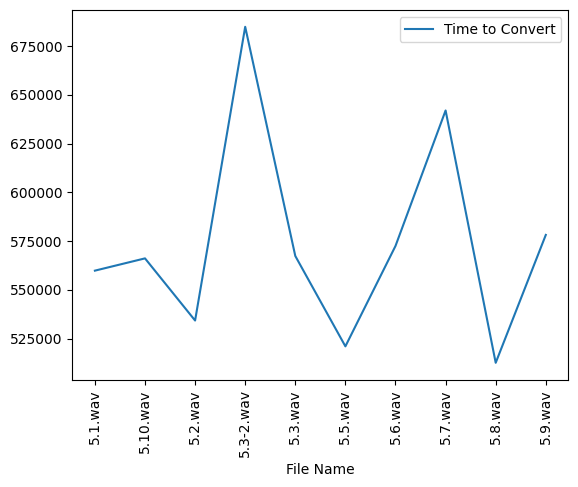

In [12]:
ggl_plot = ggl_df.plot.line(x='File Name', y='Time to Convert')
ggl_plot.set_xticks(np.arange(len(times_by_ggl_sorted)))
ggl_plot.set_xticklabels(ggl_df['File Name'])
ggl_plot.tick_params(axis='x', labelrotation=90)

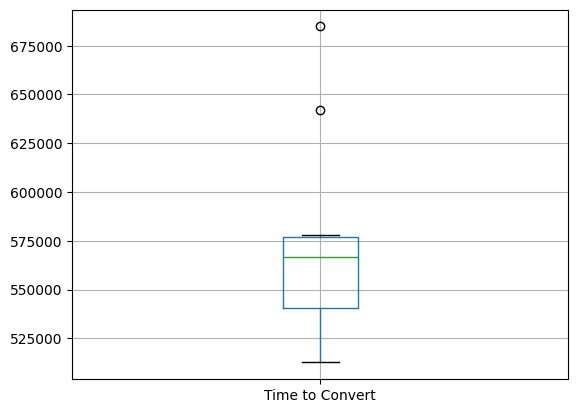

In [13]:
ggl_box_plot = ggl_df.boxplot(column='Time to Convert')

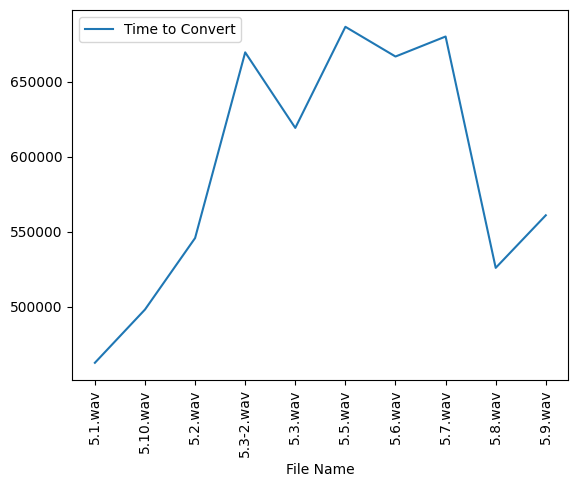

In [14]:
whisper_plot = whisper_df.plot.line(x='File Name', y='Time to Convert')
whisper_plot.set_xticks(np.arange(len(times_by_whisper_sorted)))
whisper_plot.set_xticklabels(whisper_df['File Name'])
whisper_plot.tick_params(axis='x', labelrotation=90)

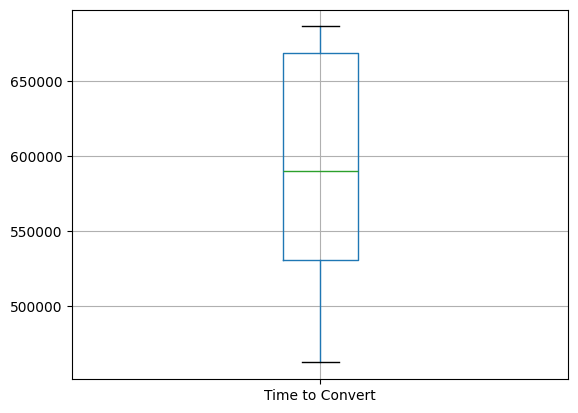

In [15]:
whisper_box_plot = whisper_df.boxplot(column='Time to Convert')

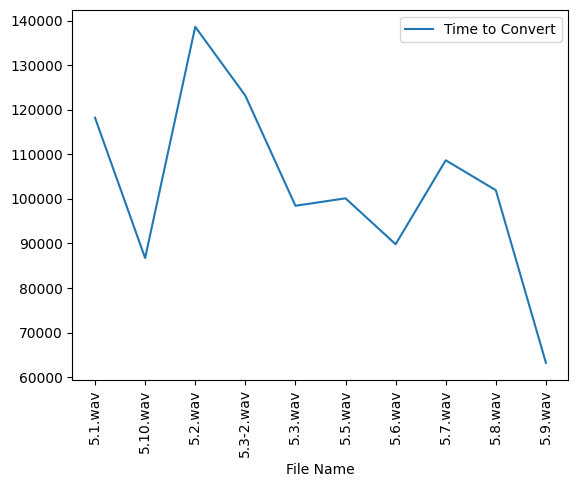

In [16]:
vosk_plot = vosk_df.plot.line(x='File Name', y='Time to Convert')
vosk_plot.set_xticks(np.arange(len(times_by_vosk_sorted)))
vosk_plot.set_xticklabels(vosk_df['File Name'])
vosk_plot.tick_params(axis='x', labelrotation=90)

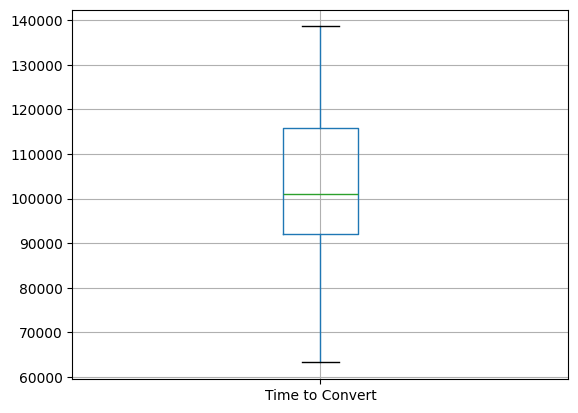

In [17]:
vosk_box_plot = vosk_df.boxplot(column='Time to Convert')